# WEEK 7
EXERCISE 1
data set = Online Retail.xlsx

# Q11
SUMMARY OF METADATA

this is a transnational dataset that contains all the transactions occuring between 1-12-2010 and 9-12-2011 for a UK based and registered online retailer.
many customers of the company are wholesalers
ATTRIBUTES :
  - InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
  - StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
  - Description: Product (item) name. Nominal
  - Quantity: The quantities of each product (item) per transaction. Numeric.
  - InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
  - UnitPrice: Unit price. Numeric, Product price per unit in sterling.
  - CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
  - Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
df_og = pd.read_excel("Online Retail.xlsx")
df_og

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Q12

In [3]:
df=df_og
df['Quantity'] = df['Quantity'].apply(lambda x : x if x > 0 else 0)

In [4]:
df['date'] = [d.date() for d in df['InvoiceDate']]
df['time'] = [d.time() for d in df['InvoiceDate']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   date         541909 non-null  object        
 9   time         541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 41.3+ MB


In [6]:
#removing the InvoiceDate column as it has been used to create two different columns named as date and time
del df['InvoiceDate']

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,date,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,12:50:00


In [8]:
import datetime
start_date = datetime.date(2011,4,1)
end_date =  datetime.date(2011,12,9)
df = df[(df['date']>start_date) & (df['date'] <= end_date)]
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,date,time
143344,C548695,82483,WOOD 2 DRAWER CABINET WHITE FINISH,0,6.95,17243.0,United Kingdom,2011-04-03,10:08:00
143345,C548695,82486,WOOD S/3 CABINET ANT WHITE FINISH,0,8.95,17243.0,United Kingdom,2011-04-03,10:08:00
143346,C548695,37449,CERAMIC CAKE STAND + HANGING CAKES,0,9.95,17243.0,United Kingdom,2011-04-03,10:08:00
143347,548696,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,8.95,17243.0,United Kingdom,2011-04-03,10:10:00
143348,548696,21754,HOME BUILDING BLOCK WORD,3,5.95,17243.0,United Kingdom,2011-04-03,10:10:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,12:50:00


# Q13

In [9]:
df['recency'] = 12-pd.DatetimeIndex(df['date']).month
df['total']=df['Quantity']*df['UnitPrice']
df

<ipython-input-9-88c846609c32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recency'] = 12-pd.DatetimeIndex(df['date']).month
<ipython-input-9-88c846609c32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total']=df['Quantity']*df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,date,time,recency,total
143344,C548695,82483,WOOD 2 DRAWER CABINET WHITE FINISH,0,6.95,17243.0,United Kingdom,2011-04-03,10:08:00,8,0.00
143345,C548695,82486,WOOD S/3 CABINET ANT WHITE FINISH,0,8.95,17243.0,United Kingdom,2011-04-03,10:08:00,8,0.00
143346,C548695,37449,CERAMIC CAKE STAND + HANGING CAKES,0,9.95,17243.0,United Kingdom,2011-04-03,10:08:00,8,0.00
143347,548696,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,8.95,17243.0,United Kingdom,2011-04-03,10:10:00,8,35.80
143348,548696,21754,HOME BUILDING BLOCK WORD,3,5.95,17243.0,United Kingdom,2011-04-03,10:10:00,8,17.85
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,12:50:00,0,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12:50:00,0,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,12:50:00,0,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,12:50:00,0,16.60


In [10]:
RFM = df.groupby('CustomerID').agg({'date': lambda date: (end_date.month - date.max().month)+(end_date.year - date.max().year) * 12 ,
                                    'InvoiceNo': lambda num: len(num),
                                    'total': lambda price: price.sum()})
RFM

,date,InvoiceNo,total
CustomerID,,,
12347.0,0,122,3122.82
12348.0,3,8,677.00
12349.0,1,73,1757.55
12352.0,1,47,944.23
12353.0,7,4,89.00
...,...,...,...
18278.0,3,9,173.90
18281.0,6,7,80.82
18282.0,0,13,178.05


In [11]:
RFM.columns = ['Recency','Frequency','Monetary']

In [12]:
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,0,122,3122.82
12348.0,3,8,677.00
12349.0,1,73,1757.55
12352.0,1,47,944.23
12353.0,7,4,89.00
...,...,...,...
18278.0,3,9,173.90
18281.0,6,7,80.82
18282.0,0,13,178.05


# Q14

In [13]:
#using elbow method to identify how many customer segments exist
#first we have to remove outliers in all the 3 categories and then we have to analyze

In [14]:
#removing outliers in recency
q1= RFM.Recency.quantile(0.1)
q3=RFM.Recency.quantile(0.90)
iqr = q3-q1
RFM = RFM[(RFM.Recency>=q1-1.5*iqr)&(RFM.Recency<=q3+1.5*iqr)]

In [15]:
#removing outliers in frequency
q1= RFM.Frequency.quantile(0.1)
q3=RFM.Frequency.quantile(0.90)
iqr = q3-q1
RFM = RFM[(RFM.Frequency>=q1-1.5*iqr)&(RFM.Frequency<=q3+1.5*iqr)]

In [16]:
#removing outliers in Monetary
q1= RFM.Monetary.quantile(0.1)
q3=RFM.Monetary.quantile(0.90)
iqr = q3-q1
RFM = RFM[(RFM.Monetary>=q1-1.5*iqr)&(RFM.Monetary<=q3+1.5*iqr)]

In [17]:
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,0,122,3122.82
12348.0,3,8,677.00
12349.0,1,73,1757.55
12352.0,1,47,944.23
12353.0,7,4,89.00
...,...,...,...
18277.0,2,8,110.38
18278.0,3,9,173.90
18281.0,6,7,80.82


In [18]:
#scaling the data after dealing with outliers

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
scaled = pd.DataFrame(scaler.fit_transform(RFM[['Recency','Frequency','Monetary']]))
scaled.columns = ['Recency','Frequency','Monetary']
scaled

,Recency,Frequency,Monetary
0,-1.076144,0.873620,1.906151
1,0.303118,-0.774048,-0.291212
2,-0.616390,0.165412,0.679571
3,-0.616390,-0.210372,-0.051129
4,2.142135,-0.831860,-0.819481
...,...,...,...
3708,-0.156636,-0.774048,-0.800273
3709,0.303118,-0.759594,-0.743205
3710,1.682381,-0.788501,-0.826830
3711,-1.076144,-0.701781,-0.739477


In [21]:
from sklearn.cluster import KMeans

In [22]:
scores = list()
for i in range(1,8):
    kmeans = KMeans(n_clusters=i,max_iter=40).fit(scaled)
    scores.append(kmeans.inertia_)

[]

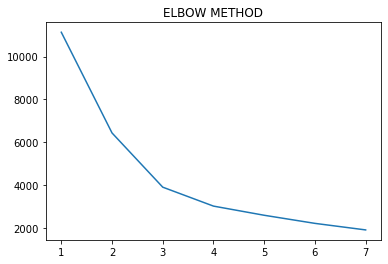

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1,8),scores)
plt.title("ELBOW METHOD")
plt.xticks(range(1,8))
plt.plot()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e. the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3

# Q15

In [24]:
kmeans = KMeans(n_clusters=3,max_iter=40).fit(scaled)
cluster_values = kmeans.labels_

In [25]:
scaled['Cluster'] = cluster_values
RFM['Cluster'] = cluster_values
scaled

,Recency,Frequency,Monetary,Cluster
0,-1.076144,0.873620,1.906151,1
1,0.303118,-0.774048,-0.291212,0
2,-0.616390,0.165412,0.679571,0
3,-0.616390,-0.210372,-0.051129,0
4,2.142135,-0.831860,-0.819481,2
...,...,...,...,...
3708,-0.156636,-0.774048,-0.800273,0
3709,0.303118,-0.759594,-0.743205,0
3710,1.682381,-0.788501,-0.826830,2
3711,-1.076144,-0.701781,-0.739477,0


# Q16

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

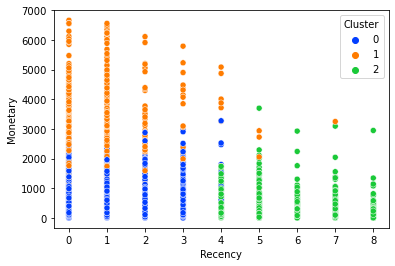

In [26]:
# Plot the clusters in a scatter plot and mark each segment differently using lmplot.
sb.scatterplot(data=RFM,x=RFM.Recency,y=RFM.Monetary,hue=RFM.Cluster,palette='bright')

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

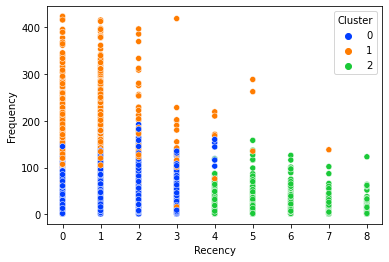

In [27]:
sb.scatterplot(x=RFM.Recency,y=RFM.Frequency,hue=RFM.Cluster,palette='bright')

<AxesSubplot:xlabel='Monetary', ylabel='Frequency'>

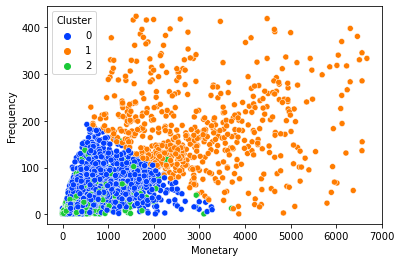

In [28]:
sb.scatterplot(x=RFM.Monetary,y=RFM.Frequency,hue=RFM.Cluster,palette='bright')

# Q17

In [29]:
cluster_center = kmeans.cluster_centers_

In [30]:
print(cluster_center)

[[-0.41257118 -0.24879723 -0.26595842]
 [-0.68195917  1.72672443  1.76237469]
 [ 1.59983315 -0.55037486 -0.52919614]]


# Q18

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
agg_clustering =AgglomerativeClustering(n_clusters=3).fit(RFM)

# Q19

[]

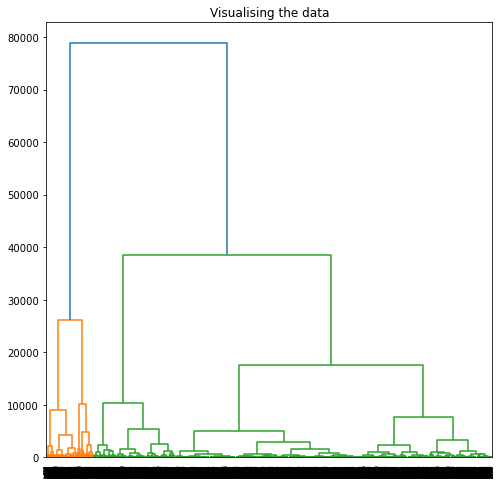

In [33]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(RFM, method ='ward')))
plt.plot()

# Q20

In [34]:
# Compare the clusters obtained using KMeans vs. Agglomeration.